In [ ]:
!ls "/content/drive/MyDrive/datamining/data/image"

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
!7za -y x "/content/drive/MyDrive/datamining/data/image/origin.7z.*"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/datamining/data/image/                                                       8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/datamining/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/datamining/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg                            

In [ ]:
#!cp ./origin "/content/drive/MyDrive/Colab Notebooks/data"

cp: cannot stat './origin': No such file or directory


In [ ]:
!cp -r ./origin "/content/drive/MyDrive/datamining/Extracted.7z*"

In [ ]:
label_file_path=r"/content/drive/MyDrive/datamining/data/label/label.lst"
images_folder_path=r"/content/drive/MyDrive/datamining/Extracted/origin"

In [ ]:
from numpy import split
import pandas as pd
df_info = pd.read_csv(label_file_path, sep=" ", header=None)
col_names="image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label".split()
df_info.columns = col_names
df_info.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [ ]:
df_sel=df_info[df_info.face_box_cofidence>40]

In [ ]:
df_sel.shape

(57931, 8)

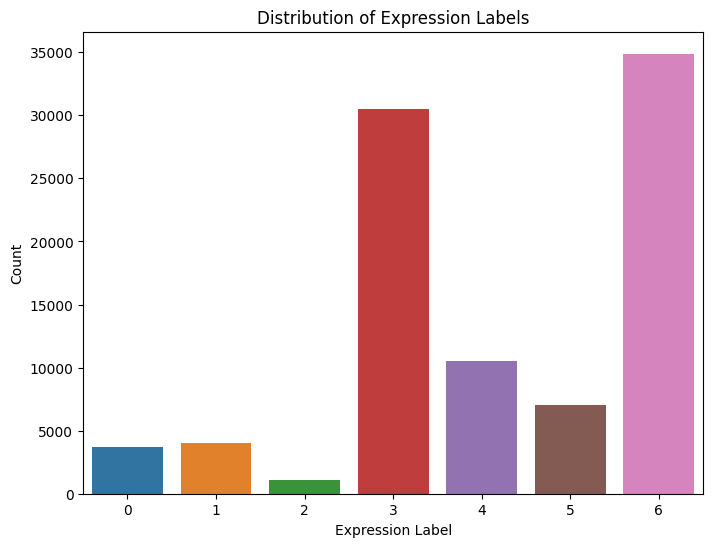

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Plot a bar chart for expression labels
plt.figure(figsize=(8, 6))
sb.countplot(x='expression_label', data=df_info)
plt.xlabel('Expression Label')
plt.ylabel('Count')
plt.title('Distribution of Expression Labels')
plt.show()


In [ ]:
from numpy.core.fromnumeric import resize
import cv2
import matplotlib.pyplot as plt
import os
x = []
y = []
for i, row in df_sel.sample(100).iterrows():
    img_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    img_path = os.path.join(images_folder_path, img_name)
    img = cv2.imread(img_path)
    # Check it is image or not
    if img is not None:
      cropped_img = img[y1:y2, x1:x2]              #Perform image cropping based on the given coordinates.
    else:
        continue

    if cropped_img is not None:
      resized_face = cv2.resize(cropped_img , ( 64,64))
    else:
      continue

    x.append(resized_face)
    y.append(label)

In [ ]:
import numpy as np
X=np.array(x)
Y=np.array(y)

In [ ]:
X

array([[[[243, 233, 233],
         [244, 232, 230],
         [243, 233, 226],
         ...,
         [233, 229, 224],
         [235, 229, 224],
         [235, 229, 224]],

        [[241, 230, 233],
         [242, 228, 230],
         [246, 232, 224],
         ...,
         [233, 228, 221],
         [237, 229, 222],
         [239, 231, 224]],

        [[243, 229, 235],
         [245, 228, 231],
         [249, 234, 225],
         ...,
         [236, 228, 222],
         [237, 228, 219],
         [238, 229, 221]],

        ...,

        [[121, 109,  45],
         [152, 133,  81],
         [179, 152, 111],
         ...,
         [243, 240, 236],
         [237, 234, 230],
         [237, 234, 230]],

        [[ 77,  62,  34],
         [ 83,  66,  48],
         [123, 104,  93],
         ...,
         [243, 238, 234],
         [246, 243, 239],
         [234, 230, 229]],

        [[ 61,  46,  37],
         [ 50,  36,  37],
         [ 71,  55,  59],
         ...,
         [196, 190, 184],
        

In [ ]:
Y

array([3, 6, 6, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 0, 4, 6, 3, 6, 3, 3, 6, 4,
       3, 3, 4, 6, 6, 6, 4, 0, 3, 0, 3, 6, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       6, 4, 3, 6, 6, 4, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 6, 6, 6, 4, 3, 6,
       0, 4, 0, 3, 1, 6, 3, 3, 1, 3, 3, 3, 5, 3, 3, 6, 6, 0, 6, 6, 5, 4])

In [ ]:
len(X)

88

In [ ]:
len(Y)

88

In [ ]:
X.shape

(88, 64, 64, 3)

In [ ]:
Y.shape


(88,)

In [ ]:
normalized_X = X / 255.0

In [ ]:
normalized_X

array([[[[0.95294118, 0.91372549, 0.91372549],
         [0.95686275, 0.90980392, 0.90196078],
         [0.95294118, 0.91372549, 0.88627451],
         ...,
         [0.91372549, 0.89803922, 0.87843137],
         [0.92156863, 0.89803922, 0.87843137],
         [0.92156863, 0.89803922, 0.87843137]],

        [[0.94509804, 0.90196078, 0.91372549],
         [0.94901961, 0.89411765, 0.90196078],
         [0.96470588, 0.90980392, 0.87843137],
         ...,
         [0.91372549, 0.89411765, 0.86666667],
         [0.92941176, 0.89803922, 0.87058824],
         [0.9372549 , 0.90588235, 0.87843137]],

        [[0.95294118, 0.89803922, 0.92156863],
         [0.96078431, 0.89411765, 0.90588235],
         [0.97647059, 0.91764706, 0.88235294],
         ...,
         [0.9254902 , 0.89411765, 0.87058824],
         [0.92941176, 0.89411765, 0.85882353],
         [0.93333333, 0.89803922, 0.86666667]],

        ...,

        [[0.4745098 , 0.42745098, 0.17647059],
         [0.59607843, 0.52156863, 0.31764706]

In [ ]:
from keras.utils import to_categorical

# Assuming Y_train contains integer class labels ranging from 0 to 6
Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_val_one_hot = to_categorical(Y_val, num_classes=7)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'x' is your input features and 'y' is the corresponding target labels
# Replace these with your actual data arrays

# Split the data into training (70%), testing (15%), and validation (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Display the sizes of each split
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 61
Validation set size: 13
Testing set size: 14


In [ ]:
X_train.shape

(61, 64, 64, 3)

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Assuming 'x_train' is your training data and 'y_train' are the corresponding labels
# Replace these with your actual training data and labels

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Random shear
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for newly created pixels
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Generate augmented data batches
augmented_data_generator = datagen.flow(X_train, Y_train, batch_size=32)

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

#Let 'x' represent the input features, and let 'y' denote the corresponding target labels.
# Replace these with your actual training data and labels

# One-hot encode the target labels
Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_val_one_hot = to_categorical(Y_val, num_classes=7)

# model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
# Compile the model
emotion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary for debugging
emotion_model.summary()


# Create an ImageDataGenerator instance with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the ImageDataGenerator on your training data
datagen.fit(X_train)

# Train the model using the augmented data
#history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
#epochs=100,
                    #validation_data=(X_val, Y_val))
# Train the model
history = emotion_model.fit(X_train, Y_train_one_hot, epochs=100, batch_size=32, validation_data=(X_val, Y_val_one_hot))


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                